### Exercise on advection-diffusion
- Write a program to integrate the advection-diffusion equation in
\begin{equation}
\frac{\partial \phi}{\partial t} + u \, \frac{\partial \phi}{\partial x} = K \frac{\partial^{2}\phi}{\partial x^{2}}.
\end{equation}
where $K$ is constant, using the scheme in 
\begin{equation}
\frac{\phi^{n+1}_{j} - \phi^{n-1}_{j}}{2\Delta t} + u \frac{\phi^{n}_{j+1} - \phi^{n}_{j-1}}{2\Delta x} = K \left( \frac{\phi^{n-1}_{j+1} - 2 \phi^{n-1}_{j} + \phi^{n1}_{j-1}}{\Delta x^{2}} \right)
\end{equation}
in the domain $0 \leq x \leq 1000\,m$ with the advection velocity $u = 0.95\,m/s$ and diffusion coefficient $K = 0.029$. Let $\Delta x = 0.2\,m$ and assume periodic boundary conditions. Assume the initial shape to be
\begin{align}
    \phi(x, 0) & = \left\{\begin{array}{ll}
      0.0 \quad \mathrm{for} \quad x < 400 \\
      0.01(x-400.0) \quad \mathrm{for} \quad 400 \leq x \leq 500 \\
      2.0-0.01(x-400.0) \quad \mathrm{for} \quad 500 \leq x \leq 600 \\
      0.0 \quad \mathrm{for} \quad x > 600
\end{array} \right.
\end{align}

- Integrate forward and show solutions from $t=0\,s$ to $t = 2000\,s$ every $500\,s$. What happens if you increase the spatial $\Delta x$ resolution? Set $\Delta x = 0.05m$.

- Apply a RAW filter with $\alpha = 0.1$ and $\beta = 0.53$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class AdvectionConvectionCTCS:
    def __init__(self, x0, x1, t0, t1, u, dx, dt, tp, K, alpha, beta):
        self.x0 = x0  
        self.x1 = x1 
        self.t0 = t0
        self.t1 = t1
        self.u = u
        self.dx = dx
        self.dt = dt
        self.tp = tp
        self.alpha = alpha
        self.beta = beta
        self.c = u * dt / dx
        self.K = K
        self.dc = self.K*dt/(dx**2)
        self.nx = round((x1 - x0) / dx) + 1
        self.x = np.linspace(x0, x1, self.nx)
        self.phi = np.array([self.phi0(xi) for xi in self.x])
        self.phi_old = np.copy(self.phi)
        self.phi_now = np.copy(self.phi)
        self.d = np.copy(self.phi)


    def phi0(self, x):
        if x < 400.0 or x > 600.0:
            return 0.0
        elif x >= 400 and x < 500:
            return 0.01*(x-400.0)
        else:
            return 2.0-0.01*(x-400.0)

    def ftcs_diff(self, phi_now):
        return phi_now - (0.5 * self.c * (np.roll(phi_now, -1) - np.roll(phi_now, 1))) + (self.dc * (np.roll(phi_now, -1) - 2.0 * phi_now + np.roll(phi_now, 1)))

    def ctcs_diff(self, phi_old, phi_now):
        phi = phi_old - self.c *(np.roll(phi_now, -1) - np.roll(phi_now, 1)) + 2.0 * self.dc * (np.roll(phi_old, -1) - 2.0 * phi_old + np.roll(phi_old, 1))
        return phi
    def plot(self):
        t = self.t0
        #if self.u > 0:
        #    self.phi_now = self.ftbs(self.phi_old)
        #else:
            
        self.phi_now = self.ftcs_diff(self.phi_old)            
        plt.plot(self.x, self.phi_now, label=f'$\phi$({int(t)} s)')
        t = self.t0 + dt
        while t < self.t1:
            phi_new = self.ctcs_diff(self.phi_old, self.phi_now)
            self.d = self.alpha * (self.phi_old + phi_new - 2.0 * self.phi_now)
            self.phi_old[:] = self.phi_now + self.beta * self.d
            self.phi_now[:] = phi_new + (1 - self.beta) * self.d  

            t += self.dt
            if np.mod(t, self.tp) < self.dt:
                plt.plot(self.x, self.phi_now, label=f'$\phi$({int(t)} s)')
            
        plt.xlabel('x')
        plt.suptitle(r'CTCS Scheme $\frac{\partial \phi}{\partial t} + u \, \frac{\partial \phi}{\partial x} = K \frac{\partial^{2}\phi}{\partial x^{2}}$.', fontsize=13)
        plt.title(rf'$\alpha =$ {self.alpha}, $\beta =$ {self.beta}, $\Delta t =$ {self.dt}, $u =$ {self.u}')
        plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
        plt.tight_layout()  # Ensures everything fits properly
        plt.savefig(f'CTCS Scheme AdCon, alpha = {self.alpha}, beta = {self.beta}.png')
        plt.show()

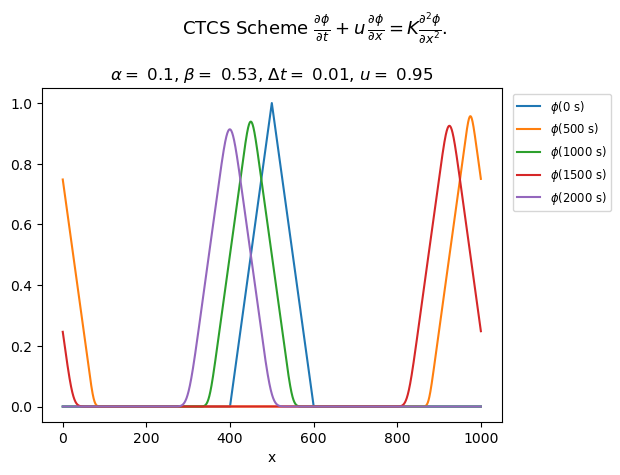

In [6]:
# Define parameters
x0 = 0.0
x1 = 1000.0
t0 = 0.0
t1 = 2000.0
u = 0.95
dx = 0.2
dt = .01
tp = 500.0
alpha = 0.1
beta = 0.53
K = 0.029

# Create and plot
AdvectionConvectionCTCS(x0, x1, t0, t1, u, dx, dt, tp, K, alpha, beta).plot()

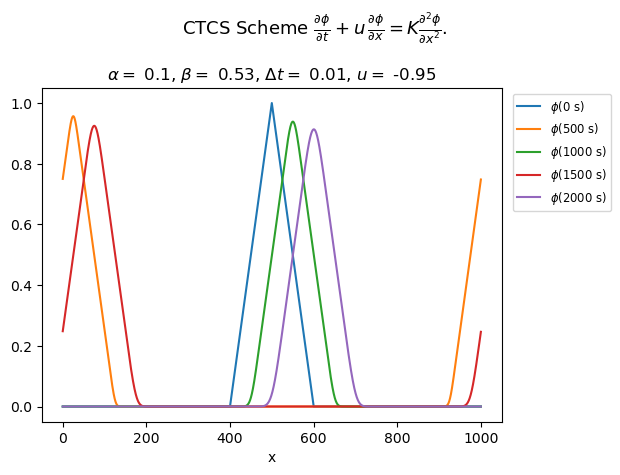

In [7]:
AdvectionConvectionCTCS(x0, x1, t0, t1, -u, dx, dt, tp, K, alpha, beta).plot()

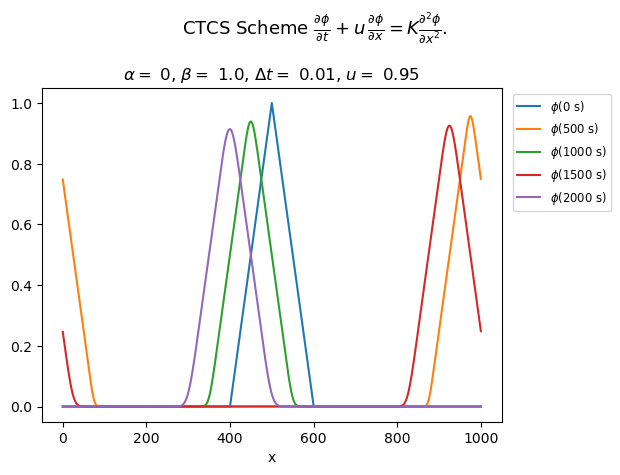

In [8]:
AdvectionConvectionCTCS(x0, x1, t0, t1, u, dx, dt, tp, K, alpha=0, beta=1.0).plot()